Nama : Fadhil Hanri Kamarz

email : fadhilhanri@gmail.com

Kelas : Belajar Machine Learning untuk Pemula

Datasets : https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

In [ ]:
import os
import zipfile
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.4.1


In [ ]:
base_dir = '/tmp/rockpaperscissors/'

if not os.path.isdir(base_dir):
  !wget --no-check-certificate / https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
  local_zip = 'rockpaperscissors.zip'
  zip_ref = zipfile.ZipFile(local_zip, 'r')
  zip_ref.extractall('/tmp')
  zip_ref.close()

train_dir = os.path.join(base_dir, 'rps-cv-images')

In [ ]:
os.listdir(base_dir)

['scissors', 'paper', 'rock', 'rps-cv-images', 'README_rpc-cv-images.txt']

In [ ]:
os.listdir(train_dir)

['scissors', 'paper', 'rock', 'README_rpc-cv-images.txt']

In [ ]:
image_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True, shear_range=0.2, validation_split=0.4)
train_generator = image_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=4, class_mode='categorical', subset='training')
validation_generator = image_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=4, class_mode='categorical', subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')       
])

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.fit(
    train_generator,  
    epochs=5,
    validation_data=validation_generator, 
    shuffle=True,
    verbose=1
)

Epoch 1/5
329/329 [==============================] - 128s 386ms/step - loss: 1.0082 - accuracy: 0.5393 - val_loss: 0.5248 - val_accuracy: 0.7563
Epoch 2/5
329/329 [==============================] - 127s 385ms/step - loss: 0.3427 - accuracy: 0.8714 - val_loss: 0.2419 - val_accuracy: 0.9199
Epoch 3/5
329/329 [==============================] - 126s 384ms/step - loss: 0.2577 - accuracy: 0.9102 - val_loss: 0.2379 - val_accuracy: 0.9222
Epoch 4/5
329/329 [==============================] - 126s 383ms/step - loss: 0.2034 - accuracy: 0.9220 - val_loss: 0.1851 - val_accuracy: 0.9382
Epoch 5/5
329/329 [==============================] - 126s 383ms/step - loss: 0.2034 - accuracy: 0.9445 - val_loss: 0.3685 - val_accuracy: 0.8993


Tes Prediksi

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from google.colab import files
from keras.preprocessing import image

%matplotlib inline

In [29]:
uploaded = files.upload()

Saving test-rock-1.jpg to test-rock-1.jpg


In [38]:
uploaded = files.upload()

Saving test-paper-1.jpeg to test-paper-1.jpeg


In [39]:
os.listdir()

['.config',
 'test-rock-1.jpg',
 'rockpaperscissors.zip',
 'test-paper-1.jpeg',
 'sample_data']

test-paper-1.jpeg
Hasil prediksi:
[[1. 0. 0.]]
paper


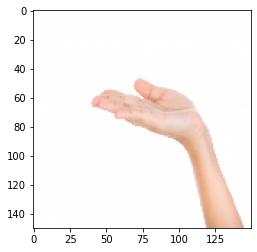

In [41]:
test_image = 'test-paper-1.jpeg'

img = image.load_img(test_image, target_size=(150,150))
imgplot = plt.imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])

classes = model.predict(images, batch_size=4)

paper    = "[[1. 0. 0.]]"
rock     = "[[0. 1. 0.]]"
scissors = "[[0. 0. 1.]]"
result = np.array_str(classes) 
  
print('Hasil prediksi:')
print(result)

if result == rock :
  print("rock")
elif result == paper :
  print("paper")
elif result == scissors :
  print("scissors")
else :
  print("Gagal melakukan prediksi")